## Implementação da Tranformada Discreta de Fourier - DFT 

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import unit_impulse

# DFT

Representação matricial

Vamos iniciar relembrando que a Transformada Discreta de Fourier (DFT) é uma representação discreta do espectro de frequências de sinais no tempo discreto x(n), cuja expressão é dada por:

$X[k] = \sum_{n=0}^{N-1} x(n) W_N^{kn}$,


sendo


$W_N = e^{-j\frac{2\pi}{N}}$.

Para um determinado \( k \) temos

$X[k] = x(0)e^{-j\frac{2\pi k \cdot 0}{N}} + x(1)e^{-j\frac{2\pi k \cdot 1}{N}} + \dots + x(N-1)e^{-j\frac{2\pi k (N-1)}{N}}$

que pode ser escrita como

$X[k] = 
\begin{bmatrix} 
1 & e^{-j\frac{2\pi k}{N}} & e^{-j\frac{2\pi k \cdot 2}{N}} & \dots & e^{-j\frac{2\pi k (N-1)}{N}}
\end{bmatrix}
\begin{bmatrix} 
x(0) \\ 
x(1) \\ 
x(2) \\ 
\vdots \\ 
x(N-1)
\end{bmatrix}$

estendendo essa representação para todos os valores de \( k \) obtemos

$\mathbf{X} =
\begin{bmatrix} 
1 & 1 & 1 & \dots & 1 \\ 
1 & e^{-j\frac{2\pi}{N}} & e^{-j\frac{2\pi \cdot 2}{N}} & \dots & e^{-j\frac{2\pi (N-1)}{N}} \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
1 & e^{-j\frac{2\pi (N-1)}{N}} & e^{-j\frac{2\pi (N-1) \cdot 2}{N}} & \dots & e^{-j\frac{2\pi (N-1)(N-1)}{N}} 
\end{bmatrix}
\begin{bmatrix} 
x(0) \\ 
x(1) \\ 
\vdots \\ 
x(N-1)
\end{bmatrix}$



## Sinais não causais

### Sinal no tempo de discreto
$x_1(n) =
\begin{cases} 
1, & -\frac{N1}{2} \leq n < \frac{N1}{2} \\
0, & \text{c.c.}
\end{cases}$


$x_2(n) =
\begin{cases} 
1, & \text{se n for par} \\
0, & \text{se n for ímpar}
\end{cases}$

$x[n]=a^{|n|}, |a|<1$


In [2]:
def porta(j, N1):
    if j >= -N1 and j <= N1:
        return 1
    return 0

In [3]:
def porta_2(j, N1):
        
    if j >= -N1 and j <= N1:
        if j%2 == 0:
            return 1
    return 0

In [4]:
def f_a(j, N1, a):
        
    if j >= -N1 and j <= N1:
        if j >= 0:
            return a**j
        else:
            return a**(-j)
    return 0

### Parametros da DFT


In [6]:
N = 64 # Tamanho da DFT

k = np.array([np.arange(-N/2, (N+1)/2)]) # Número de amostras
n = np.arange(-N/2, (N+1)/2) # Índice do somatório
k_T = k.reshape(-1, 1) # Número de amostras organizadas como uma matriz Nx1

# print((k_T*n).shape)

### Funções de entrada

In [7]:
N1 = 2 # Tamanho da porta simétrica em y                                                                      
func = np.array([porta(i, N1) for i in n]) # Sinal no tempo discreto

In [178]:
N1 = 5 # Tamanho da porta simétrica em y                                                                      
func = np.array([porta_2(i, N1) for i in n])

In [198]:
N1 = 20
a = 0.5
func = np.array([f_a(i, N1, a) for i in n])

### Cálculo DFT

In [8]:
func_T = func.reshape(-1, 1) # Amostras organizadas como uma matriz Nx1

Wn = np.exp(-2j*np.pi/N) # Definição de Wn

M_result = Wn**(k_T*n) # Matriz com as exponenciais complexas
DFT = M_result @ func_T

### Plot

/home/luiz/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/luiz/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[Text(-3.141592653589793, 0, '$-\\pi$'),
 Text(-1.5707963267948966, 0, '$-\\pi/2$'),
 Text(0.0, 0, '0'),
 Text(1.5707963267948966, 0, '$\\pi/2$'),
 Text(3.141592653589793, 0, '$\\pi$')]

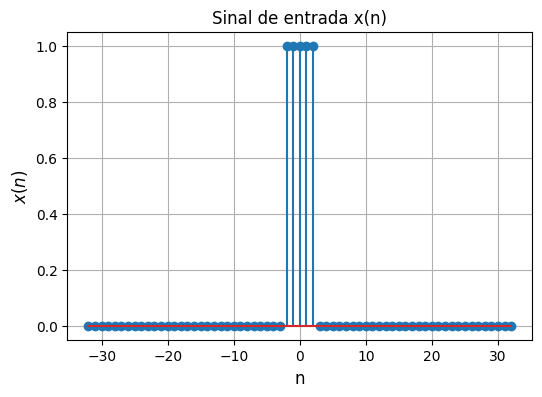

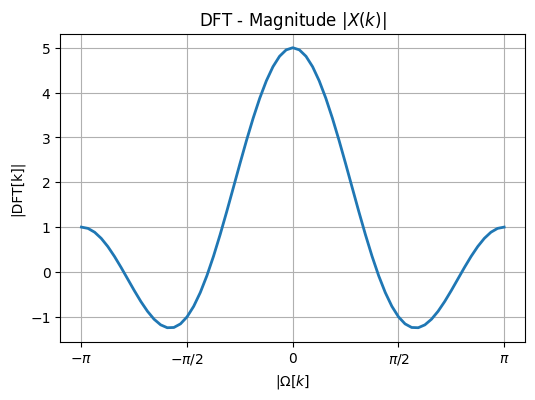

In [12]:
plt.figure(figsize=(6, 4))
plt.title('Sinal de entrada x(n)')
plt.stem(n, func)
plt.xlabel('n', fontsize=12)
plt.ylabel('$x(n)$', fontsize=12)
plt.grid()
# plt.xlim(-5,5)

xticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
xticklabels = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$']

fig, axs  = plt.subplots(1, 1, figsize=(6,4))

axs.plot(2*np.pi*k_T/N, (DFT.flatten()), lw=2)
axs.set_xlabel('$|\Omega[k]$')
axs.set_ylabel('|DFT[k]|')
axs.grid()
axs.set_title('DFT - Magnitude |$X(k)$|')
axs.set_xticks(xticks)
axs.set_xticklabels(xticklabels)

# A INFORMAÇÃO DA FASE PARA SINAIS NÃO CAUSAIS NÃO CONTRIBUI PARA ANÁLISE
# axs[1].plot(2*np.pi*k_T/N, np.angle(DFT)*180/np.pi, lw=2, color='r')
# axs[1].set_xlabel('$|\Omega[k]$')
# axs[1].set_ylabel('$O^°$')
# axs[1].grid()
# axs[1].set_title('DFT - $Fase (^°)$')
# axs[1].set_xticks(xticks)
# axs[1].set_xticklabels(xticklabels)

## Sinais causais

### Parâmetros da DFT

In [181]:
N = 64 # Tamanho da DFT

k = np.array([np.arange(0, N)]) # Número de amostras
n = np.arange(0, N) # Índice do somatório
k_T = k.reshape(-1, 1) # Número de amostras organizadas como uma matriz Nx1

### Funções de entrada

In [ ]:
# Impulso 
func = np.zeros(N) 
func[2] = 1     # Deslocamento

In [186]:
# Sinal do tipo: x[n] = a^(n).u[n], |a|<1 
a = -0.5
N1 = 20 # Quantidade de pontos da exponecial
func = np.zeros(N) 
for i in range(N1):                                                              
    func[i] = a**i

### Cálculo da DFT

In [187]:
func_T = func.reshape(-1, 1) # Amostras organizadas como uma matriz Nx1

Wn = np.exp(-2j*np.pi/N) # Definição de Wn

M_result = Wn**(k_T*n) # Matriz com as exponenciais complexas

DFT = M_result @ func_T

### Plot

[Text(0.0, 0, '0'),
 Text(1.5707963267948966, 0, '$\\pi/2$'),
 Text(3.141592653589793, 0, '$\\pi$'),
 Text(4.71238898038469, 0, '$3\\pi/2$'),
 Text(6.283185307179586, 0, '$2\\pi$')]

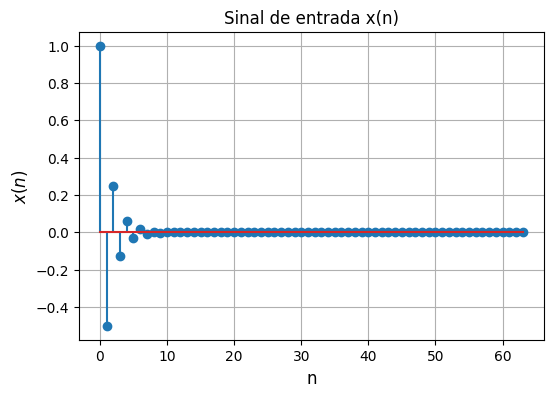

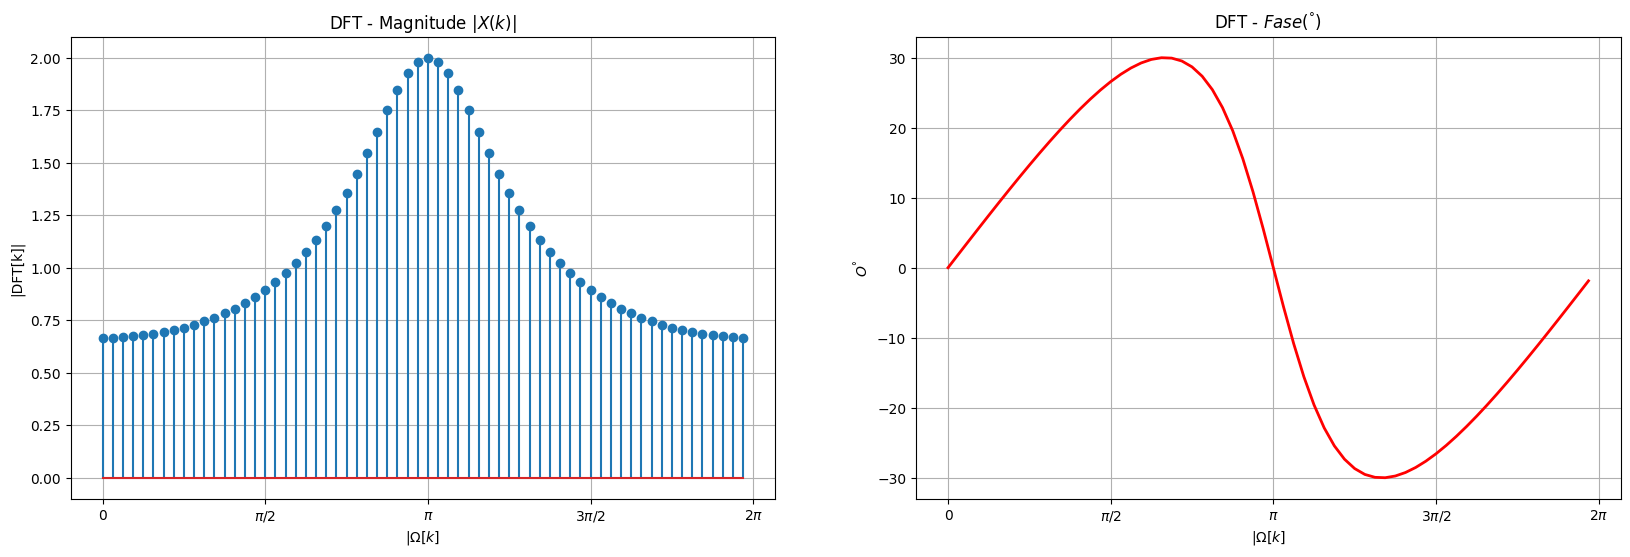

In [188]:
plt.figure(figsize=(6, 4))
plt.title('Sinal de entrada x(n)')
plt.stem(n, func)
plt.xlabel('n', fontsize=12)
plt.ylabel('$x(n)$', fontsize=12)
plt.grid()
# plt.xlim(-5,5)

xticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
xticklabels = ['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']

fig, axs  = plt.subplots(1, 2, figsize=(20,6))

axs[0].stem(2*np.pi*k_T/N, np.abs(DFT.flatten()))
axs[0].set_xlabel('$|\Omega[k]$')
axs[0].set_ylabel('|DFT[k]|')
axs[0].grid()
axs[0].set_title('DFT - Magnitude |$X(k)$|')
axs[0].set_xticks(xticks)
axs[0].set_xticklabels(xticklabels)

axs[1].plot(2*np.pi*k_T/N, np.angle(DFT)*180/np.pi, lw=2, color='r')
axs[1].set_xlabel('$|\Omega[k]$')
axs[1].set_ylabel('$O^°$')
axs[1].grid()
axs[1].set_title('DFT - $Fase (^°)$')
axs[1].set_xticks(xticks)
axs[1].set_xticklabels(xticklabels)

# Gráfico (N x tempo de amostra)

In [50]:
import time

times = np.array([])

num_sample = 14 # Exemplo: 2^10 = 1024
amostras = 2**(np.arange(1, num_sample+1))

for i in amostras:
    
    # Parâmetros da DFT
    N = i # Tamanho da DFT

    k = np.array([np.arange(0, N)]) # Número de amostras
    n = np.arange(0, N) # Índice do somatório
    k_T = k.reshape(-1, 1) # Número de amostras organizadas como uma matriz Nx1

    func = np.zeros(N) 
    func[1] = 1     # Deslocamento
    
    # Cálculo da DFT

    func_T = func.reshape(-1, 1) # Amostras organizadas como uma matriz Nx1

    Wn = np.exp(-2j*np.pi/N) # Definição de Wn

    M_result = Wn**(k_T*n) # Matriz com as exponenciais complexas

    start_time = time.perf_counter()
    DFT = M_result @ func_T
    end_time = time.perf_counter() - start_time

    times = np.append(times, end_time)

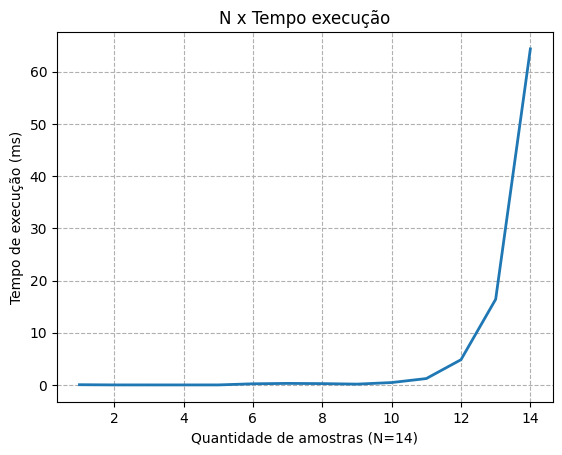

In [51]:
plt.plot(np.log2(amostras), times*1e3, lw=2)
# plt.yscale('log')
plt.xlabel(f'Quantidade de amostras (N={len(amostras)})')
plt.ylabel('Tempo de execução (ms)')
plt.grid(True, which='both', ls='--')
plt.title('N x Tempo execução')
plt.savefig('tempo_execucao.png')
plt.show()